Here is the implementation of PCA and KPCA using PyOD and Scikit-learn

#ANOMALY DETECTION


References PCA,KPCA: 
1. https://medium.com/dataman-in-ai/handbook-of-anomaly-detection-with-python-outlier-detection-5-pca-d1acbdba1b7e
2. https://github.com/dataman-git/codes_for_articles/blob/master/05.%20PCA.ipynb
3. https://www.datatechnotes.com/2022/01/kernelpca-projection-example-in-python.html
4. https://github.com/JAVI897/Kernel-PCA
5. https://colab.research.google.com/drive/1rrEw6pxir1ilV2XE6U8BuTOtUMyGFjmF?usp=sharing#scrollTo=l-jnnCHShoFm
6. https://pyod.readthedocs.io/en/latest/pyod.models.html
7. https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html#sphx-glr-auto-examples-decomposition-plot-kernel-pca-py
8. https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA.inverse_transform
9. https://scikit-learn.org/stable/modules/decomposition.html#bakir2003
10. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
11. https://github.com/yzhao062/pyod/blob/master/pyod/models/kpca.py
12. https://github.com/yzhao062/pyod/blob/master/pyod/models/pca.py
13. https://hub.gke2.mybinder.org/user/scikit-learn-scikit-learn-t3cqyeel/lab/tree/notebooks/auto_examples/decomposition/plot_kernel_pca.ipynb


DATASETS:
1. https://archive.ics.uci.edu/ml/datasets/HTRU2#
2. https://archive.ics.uci.edu/ml/datasets/Lymphography

Next DATASETS:
1. https://keras.io/api/datasets/
2. http://odds.cs.stonybrook.edu/
3. https://archive.ics.uci.edu/ml/datasets/


Maybe we should try this implementation:
1. https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html#sphx-glr-auto-examples-decomposition-plot-kernel-pca-py
2. https://www.section.io/engineering-education/kernel-pca-in-python/


Questions:
1. *Is the plots correct? *
2. *Standardize the data *

# **Import Libraries**

In [ ]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
from numpy import reshape
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

!pip install pyod            # normal install
!pip install --upgrade pyod  # or update if needed
from pyod.models.pca import PCA as PCA_PYOD
from pyod.models.kpca import KPCA as KPCA_PYOD
from sklearn.decomposition import PCA, KernelPCA
from sklearn.linear_model import LogisticRegression

from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from keras.datasets import mnist
from sklearn.datasets import load_iris, load_breast_cancer

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# For working in google_colab
from google.colab import drive
drive.mount('/content/drive')

# Add the folder to your google drive account to run it and change the directory path.
# You can also add Datasets to try it.
# LINK of Datasets: https://drive.google.com/drive/folders/12K1jIqNfU_yVOSdn_pqOX9kIVAgLRFPg?usp=sharing

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Load Datasets**

In [ ]:
# Save all datasets
directory_path = "/content/drive/MyDrive/KPCA_PCA/datasets/"
dataset_ex = ['.csv', '.data', '.mat']
datasets = [f for f in os.listdir(directory_path) if ( f.endswith('.data') or f.endswith('.csv') or f.endswith('.mat')) and f not in dataset_ex]
datasets

['HTRU_2.csv',
 'lymphography.data',
 'musk.mat',
 'cardio.mat',
 'mnist.mat',
 'bupa.data',
 'badges.data',
 'vowel-context.data',
 'arrhythmia.data']

# **Our Datasets**
Run only one and then continue

## **HTRU2 dataset**



17,898 total examples.
1,639 positive examples. as outliers
16,259 negative examples. as inliers

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.
9. Class

In [ ]:
dataset = datasets[0]
df = pd.read_csv(directory_path + dataset, header=None)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X = scaler.fit_transform(X)

In [ ]:
counts = df[8].value_counts()
contamination = counts[1]/(counts[0] + counts[1])  # percentage of outliers
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

X_train_pd = pd.DataFrame(X_train)
X_train_pd.head()

,0,1,2,3,4,5,6,7
0,0.062971,1.162648,-0.171862,-0.348320,-0.386677,-0.676617,0.955283,0.715130
1,-0.773031,-0.710930,0.015077,-0.124191,-0.238614,-0.091203,-0.782211,-0.752064
2,-0.364015,-0.279495,-0.157062,-0.191103,-0.333228,-0.421810,0.119655,-0.140943
3,1.634777,-0.235911,-0.733803,-0.225069,-0.346732,-0.565516,0.189013,0.020776
4,-1.362344,-0.935907,0.370858,0.047962,-0.379840,-0.520631,0.826682,0.414455



## **Lymphography dataset**


Data Set Information:

This is one of three domains provided by the Oncology Institute that has repeatedly appeared in the machine learning literature. (See also breast-cancer and primary-tumor.)


Attribute Information:

--- NOTE: All attribute values in the database have been entered as numeric values corresponding to their index in the list of attribute values for that attribute domain as given below.
1. class: normal find, metastases, malign lymph, fibrosis
2. lymphatics: normal, arched, deformed, displaced
3. block of affere: no, yes
4. bl. of lymph. c: no, yes
5. bl. of lymph. s: no, yes
6. by pass: no, yes
7. extravasates: no, yes
8. regeneration of: no, yes
9. early uptake in: no, yes
10. lym.nodes dimin: 0-3
11. lym.nodes enlar: 1-4
12. changes in lym.: bean, oval, round
13. defect in node: no, lacunar, lac. marginal, lac. central
14. changes in node: no, lacunar, lac. margin, lac. central
15. changes in stru: no, grainy, drop-like, coarse, diluted, reticular, stripped, faint,
16. special forms: no, chalices, vesicles
17. dislocation of: no, yes
18. exclusion of no: no, yes
19. no. of nodes in: 0-9, 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, >=70

Class Distribution:
Class:        Number of Instances:

    1. normal find:  2
    2. metastases:   81
    3. malign lymph: 61
    4. fibrosis:     4
The original lymphography dataset from UCI machine learning repository is a classification dataset. It is a multi-class dataset having four classes, but two of them are quite small (2 and 4 data records). Therefore, those two small classes are merged and considered as outliers compared to other two large classes (81 and 61 data records).

In [ ]:
dataset = datasets[1]
df = pd.read_csv(directory_path + dataset, header=None)
X = df.iloc[:, 1:].values
X = scaler.fit_transform(X)

df['target'] = df.iloc[:, 0].replace({4: 1, 1: 1, 3: 0, 2: 0})
y = df.iloc[:, -1].values
y

counts = df['target'].value_counts()
contamination = counts[1]/(counts[0] +counts[1])  # percentage of outliers
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

X_train_pd = pd.DataFrame(X_train)
X_train_pd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.542520,0.897150,2.166174,4.488079,1.763834,0.986577,3.714835,0.650444,-0.194597,1.831416,1.061708,1.19462,1.575155,0.824292,0.863682,0.714286,0.514740,2.843524
1,-0.912243,-1.114641,-0.461644,-0.222812,-0.566947,-1.013606,-0.269191,0.650444,-0.194597,-0.567253,-0.703829,-1.11654,-1.059002,-0.562017,-1.718641,0.714286,-1.942728,-0.316738
2,1.542520,-1.114641,-0.461644,-0.222812,-0.566947,-1.013606,-0.269191,-1.537412,3.005449,-1.766587,1.061708,1.19462,-1.059002,1.286395,-1.718641,0.714286,0.514740,-0.843448
3,0.315138,-1.114641,-0.461644,-0.222812,-0.566947,-1.013606,-0.269191,-1.537412,-0.194597,-0.567253,-0.703829,-1.11654,-1.059002,-0.099914,-1.718641,-1.400000,0.514740,-0.316738
4,1.542520,0.897150,-0.461644,-0.222812,1.763834,0.986577,-0.269191,0.650444,-0.194597,0.632082,1.061708,1.19462,-1.059002,-0.099914,0.863682,0.714286,0.514740,0.209972


## **Musk dataset**


Dataset information:

The original musk dataset from UCI machine learning repository contains several musk and non-musk classes. The non-musk classes j146, j147, and 252 are combined to form the inliers, while the musk classes 213 and 211 are added as outliers without downsampling. Other classes are discarded. 

In [ ]:
dataset = datasets[3]
data = loadmat(directory_path + dataset)
df = pd.DataFrame(data['X'])
df['target'] = data['y']

In [ ]:
data['X'].shape

(1831, 21)

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X = scaler.fit_transform(X)

counts = df['target'].value_counts()
contamination = counts[1]/(counts[0] +counts[1])  # percentage of outliers

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
X_train_pd = pd.DataFrame(X_train)
X_train_pd.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.639989,-0.920240,-0.203696,-0.359548,-0.683785,-0.061417,-0.278371,-0.334376,-0.746689,0.201971,...,-1.347365,1.447146,-0.565488,-0.753601,-0.488412,0.361679,0.512494,0.438519,-0.657369,-0.493429
1,1.169219,-0.386622,0.886311,-1.267294,2.059859,-0.061417,-0.278371,1.161670,2.728624,-0.420602,...,1.830666,-0.834241,2.515431,1.999203,2.415104,0.542075,-1.403472,0.852436,0.946285,-0.493429
2,0.957527,0.046391,-0.203696,-1.636318,-0.683785,-0.061417,-0.278371,0.024675,-0.399158,-0.420602,...,0.691871,-0.727301,0.314774,-1.097701,-0.488412,1.023131,1.151149,1.059394,-0.456912,1.140329
3,0.639989,2.638048,-0.203696,0.414298,-0.683785,-0.061417,-0.278371,0.383726,-0.630846,-0.420602,...,-0.658792,1.126326,0.369791,-0.753601,-0.488412,0.662339,1.023418,0.852436,-0.523731,-0.493429
4,-0.736008,-0.443454,-0.203696,0.012292,-0.683785,-0.061417,-0.278371,-0.274534,-0.862533,0.139713,...,-1.188464,1.126326,-0.730538,-1.097701,-0.488412,-0.299773,-0.062296,-0.320328,-0.623959,-2.127186


## **Iris dataset**
Is not one class

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target
X = scaler.fit_transform(X)

In [ ]:
counts = df['target'].value_counts()
contamination = counts[1]/(counts[0] +counts[1])  # percentage of outliers

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

X_train_pd = pd.DataFrame(X_train)
X_train_pd.head()

,0,1,2,3
0,-0.900681,-1.282963,-0.430828,-0.130755
1,0.432165,-1.973554,0.421734,0.395774
2,-0.900681,1.709595,-1.283389,-1.183812
3,1.159173,0.328414,1.217458,1.448832
4,-0.173674,-0.592373,0.194384,0.132510




## **MNIST dataset**

In [ ]:
dataset = datasets[4]
data = loadmat(directory_path + dataset)
df = pd.DataFrame(data['X'])
df['target'] = data['y']
df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,target
0,-0.0036,-73.804153,198.205963,0.0,-13.124617,-1.1501,0.0,-0.141633,179.249390,114.661163,...,-0.107667,-4.469967,158.381409,-137.100632,27.131416,-2.274633,-0.00065,-12.351267,0.0,0
1,-0.0036,-73.804153,197.205963,0.0,-13.124617,-1.1501,0.0,-0.141633,179.249390,-44.338833,...,-0.107667,-4.469967,123.381416,-137.100632,157.131409,-2.274633,-0.00065,-12.351267,0.0,0
2,-0.0036,-73.804153,-53.794033,0.0,-13.124617,-1.1501,0.0,-0.141633,-73.750618,-44.338833,...,-0.107667,-4.469967,157.381409,-137.100632,-93.868584,-2.274633,-0.00065,-12.351267,0.0,0
3,-0.0036,-73.804153,86.205963,0.0,-13.124617,-1.1501,0.0,-0.141633,76.249382,208.661163,...,-0.107667,-4.469967,157.381409,-137.100632,74.131416,-2.274633,-0.00065,-12.351267,0.0,0
4,-0.0036,-27.804153,199.205963,0.0,-13.124617,-1.1501,0.0,-0.141633,179.249390,-44.338833,...,-0.107667,-4.469967,22.381416,-137.100632,159.131409,-2.274633,-0.00065,-12.351267,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7598,-0.0036,179.195847,0.205967,0.0,-13.124617,-1.1501,0.0,-0.141633,179.249390,-44.338833,...,-0.107667,-4.469967,159.381409,115.899368,-93.868584,-2.274633,-0.00065,-12.351267,0.0,1
7599,-0.0036,-73.804153,-53.794033,0.0,29.875383,-1.1501,0.0,-0.141633,-73.750618,67.661163,...,-0.107667,-4.469967,-93.618584,94.899368,-93.868584,-2.274633,-0.00065,-12.351267,0.0,1
7600,-0.0036,-73.804153,-53.794033,0.0,-13.124617,-1.1501,0.0,-0.141633,-73.750618,-44.338833,...,-0.107667,-4.469967,-93.618584,-137.100632,-53.868584,-2.274633,-0.00065,-12.351267,0.0,1
7601,-0.0036,-73.804153,-53.794033,0.0,19.875383,-1.1501,0.0,-0.141633,153.249390,-44.338833,...,-0.107667,-4.469967,158.381409,23.899368,-93.868584,-2.274633,-0.00065,125.648735,0.0,1


In [ ]:
data['X'].shape

(7603, 100)

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X = scaler.fit_transform(X)

counts = df['target'].value_counts()
contamination = counts[1]/(counts[0] + counts[1])  # percentage of outliers
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

X_train_pd = pd.DataFrame(X_train)
X_train_pd.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,-0.667510,0.958133,0.0,-0.208549,-0.063490,0.0,-0.026254,-1.543515,0.533873,...,0.002568,0.0,4.408915,0.819529,-0.309656,-0.587901,-0.089334,-0.011469,2.419760,0.0
1,0.0,0.125665,0.967269,0.0,-0.208549,-0.063490,0.0,-0.026254,0.568647,-0.695434,...,1.049487,0.0,-0.311593,-1.405250,-0.309656,2.258400,-0.089334,-0.011469,-0.270945,0.0
2,0.0,-0.163611,0.327786,0.0,-0.208549,-0.063490,0.0,-0.026254,-0.658690,-0.601674,...,1.040383,0.0,-0.311593,0.940542,-0.309656,-0.587901,-0.089334,-0.011469,-0.540015,0.0
3,0.0,-0.919459,0.958133,0.0,-0.208549,8.868944,0.0,-0.026254,0.863589,-0.695434,...,-1.262837,0.0,-0.311593,0.949851,-0.309656,-0.587901,-0.089334,-0.011469,-0.540015,0.0
4,0.0,1.441402,0.958133,0.0,-0.208549,-0.063490,0.0,-0.026254,0.863589,-0.695434,...,1.040383,0.0,-0.311593,-1.405250,-0.309656,-0.587901,-0.089334,-0.011469,2.010305,0.0


##**Liver dataset**

https://archive.ics.uci.edu/ml/machine-learning-databases/liver-disorders/bupa.data

1. Title: BUPA liver disorders

2. Source information:

   -- Creators: BUPA Medical Research Ltd.

   -- Donor: Richard S. Forsyth 8 Grosvenor Avenue Mapperley Park Nottingham NG3 5DX, 0602-621676
   
   -- Date: 5/15/1990

3. Past usage: 
   -- None known other than what is shown in the PC/BEAGLE User's Guide
      (written by Richard S. Forsyth).

4. Relevant information:
   -- The first 5 variables are all blood tests which are thought
      to be sensitive to liver disorders that might arise from
      excessive alcohol consumption.  Each line in the bupa.data file
      constitutes the record of a single male individual.
   -- It appears that drinks>5 is some sort of a selector on this database.
      See the PC/BEAGLE User's Guide for more information.

5. Number of instances: 345

6. Number of attributes: 7 overall

7. Attribute information:
   1. mcv	mean corpuscular volume
   2. alkphos	alkaline phosphotase
   3. sgpt	alamine aminotransferase
   4. sgot 	aspartate aminotransferase
   5. gammagt	gamma-glutamyl transpeptidase
   6. drinks	number of half-pint equivalents of alcoholic beverages drunk per day
   7. selector  field used to split data into two sets

8. Missing values: none

1-5: blood, 6th -> gives the drinks  and if is drinks>5 then HIGH:1 if drinks<=5 then drinks LO:0. the 7th column gives the recommendes train and test data. We can try with random test and train data and we can try the recommended. WE HAVE TO REMOVE THE DOUBLE ENTRIES (clean data):

Thanks to Leon for mentioning that there are duplicates in this data set.
--UCI ML Librarian

row 84 and 86:   94,58,21,18,26,2.0,

row 141 and 318:   92,80,10,26,20,6.0,1

row 143 and 150:   91,63,25,26,15,6.0,1

row 170 and 176:   97,71,29,22,52,8.0,1


In [ ]:
dataset = datasets[5]
df = pd.read_csv(directory_path + dataset, header=None)
df

,0,1,2,3,4,5,6
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,2
2,86,54,33,16,54,0.0,2
3,91,78,34,24,36,0.0,2
4,87,70,12,28,10,0.0,2
...,...,...,...,...,...,...,...
340,99,75,26,24,41,12.0,1
341,96,69,53,43,203,12.0,2
342,98,77,55,35,89,15.0,1
343,91,68,27,26,14,16.0,1


In [ ]:
# Remove the duplicates
df = df.drop_duplicates(keep=False)
df = df.reset_index(drop=True)
df

,0,1,2,3,4,5,6
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,2
2,86,54,33,16,54,0.0,2
3,91,78,34,24,36,0.0,2
4,87,70,12,28,10,0.0,2
...,...,...,...,...,...,...,...
332,99,75,26,24,41,12.0,1
333,96,69,53,43,203,12.0,2
334,98,77,55,35,89,15.0,1
335,91,68,27,26,14,16.0,1


In [ ]:
df['target'] = df[5].apply(lambda x: 0  if x <= 5 else 1)
df

,0,1,2,3,4,5,6,target
0,85,92,45,27,31,0.0,1,0
1,85,64,59,32,23,0.0,2,0
2,86,54,33,16,54,0.0,2,0
3,91,78,34,24,36,0.0,2,0
4,87,70,12,28,10,0.0,2,0
...,...,...,...,...,...,...,...,...
332,99,75,26,24,41,12.0,1,1
333,96,69,53,43,203,12.0,2,1
334,98,77,55,35,89,15.0,1,1
335,91,68,27,26,14,16.0,1,1


In [ ]:
X = df.iloc[:, :-2].values
y = df.iloc[:, -1].values
X

array([[85., 92., 45., 27., 31.,  0.],
       [85., 64., 59., 32., 23.,  0.],
       [86., 54., 33., 16., 54.,  0.],
       ...,
       [98., 77., 55., 35., 89., 15.],
       [91., 68., 27., 26., 14., 16.],
       [98., 99., 57., 45., 65., 20.]])

In [ ]:
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 'target'], dtype='object')

In [ ]:
counts = df['target'].value_counts()
contamination = counts[1]/(counts[0] +counts[1])

#contamination =   # percentage of outliers
n_features = 5              # number of features
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

X_train_pd = pd.DataFrame(X_train)
X_train_pd.head()


,0,1,2,3,4,5
0,82.0,62.0,17.0,17.0,15.0,0.5
1,87.0,69.0,22.0,26.0,11.0,0.5
2,96.0,70.0,21.0,26.0,21.0,4.0
3,90.0,73.0,24.0,23.0,11.0,0.5
4,89.0,63.0,22.0,27.0,10.0,4.0



##**Arrhythmia dataset**


https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data

Data Set Information:

This database contains 279 attributes, 206 of which are linear valued and the rest are nominal.

Concerning the study of H. Altay Guvenir: "The aim is to distinguish between the presence and absence of cardiac arrhythmia and to classify it in one of the 16 groups. Class 01 refers to 'normal' ECG classes 02 to 15 refers to different classes of arrhythmia and class 16 refers to the rest of unclassified ones. For the time being, there exists a computer program that makes such a classification. However there are differences between the cardiolog's and the programs classification. Taking the cardiolog's as a gold standard we aim to minimise this difference by means of machine learning tools."

The names and id numbers of the patients were recently removed from the database.



Attribute Information:

-- Complete attribute documentation:
1. Age: Age in years , linear
2. Sex: Sex (0 = male; 1 = female) , nominal
3. Height: Height in centimeters , linear
4. Weight: Weight in kilograms , linear
5. QRS duration: Average of QRS duration in msec., linear
6. P-R interval: Average duration between onset of P and Q waves in msec., linear
7. Q-T interval: Average duration between onset of Q and offset of T waves in msec., linear
8. T interval: Average duration of T wave in msec., linear
9. P interval: Average duration of P wave in msec., linear
Vector angles in degrees on front plane of:, linear
10. QRS
11. T
12. P
13. QRST
14. J

15. Heart rate: Number of heart beats per minute ,linear
Of channel DI:
Average width, in msec., of: linear
16 Q wave
17 R wave
18 S wave
19 R' wave, small peak just after R
20 S' wave

21 Number of intrinsic deflections, linear

22 Existence of ragged R wave, nominal
23 Existence of diphasic derivation of R wave, nominal
24 Existence of ragged P wave, nominal
25 Existence of diphasic derivation of P wave, nominal
26 Existence of ragged T wave, nominal
27 Existence of diphasic derivation of T wave, nominal

Of channel DII:
28 .. 39 (similar to 16 .. 27 of channel DI)
Of channels DIII:
40 .. 51
Of channel AVR:
52 .. 63
Of channel AVL:
64 .. 75
Of channel AVF:
76 .. 87
Of channel V1:
88 .. 99
Of channel V2:
100 .. 111
Of channel V3:
112 .. 123
Of channel V4:
124 .. 135
Of channel V5:
136 .. 147
Of channel V6:
148 .. 159

Of channel DI:
Amplitude , * 0.1 milivolt, of
160 JJ wave, linear
161 Q wave, linear
162 R wave, linear
163 S wave, linear
164 R' wave, linear
165 S' wave, linear
166 P wave, linear
167 T wave, linear

168 QRSA , Sum of areas of all segments divided by 10, ( Area= width * height / 2 ), linear
169 QRSTA = QRSA + 0.5 * width of T wave * 0.1 * height of T wave. (If T is diphasic then the bigger segment is considered), linear

Of channel DII:
170 .. 179
Of channel DIII:
180 .. 189
Of channel AVR:
190 .. 199
Of channel AVL:
200 .. 209
Of channel AVF:
210 .. 219
Of channel V1:
220 .. 229
Of channel V2:
230 .. 239
Of channel V3:
240 .. 249
Of channel V4:
250 .. 259
Of channel V5:
260 .. 269
Of channel V6:
270 .. 279



In [ ]:
dataset = datasets[8]
df = pd.read_csv(directory_path + dataset, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [ ]:
# Missing Attribute Values: Several.  Distinguished with '?'
df.replace({col: {'?': np.nan} for col in df}, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [ ]:
# Count the number of NaN values in each row
nan_rows = df.isnull().any(axis=1).sum()
print("Number of rows with NaN values:", nan_rows)

# Count the number of NaN values in each column
nan_columns = df.isnull().any(axis=0).sum()
print("Number of columns with NaN values:", nan_columns)

Number of rows with NaN values: 384
Number of columns with NaN values: 5


In [ ]:
#We will remove the columns
df = df.dropna(axis=1)
print("The new shape of the dataset is:", df.shape)
print("Number of rows with NaN values:", df.isnull().any(axis=1).sum())
print("Number of columns with NaN values:", df.isnull().any(axis=0).sum())
df.head()

The new shape of the dataset is: (452, 275)
Number of rows with NaN values: 0
Number of columns with NaN values: 0


,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7



```
# Class code :   Class :     Number of instances:
       01             Normal  245
       02             Ischemic changes (Coronary Artery Disease)  44
       03             Old Anterior Myocardial Infarction  15
       04             Old Inferior Myocardial Infarction  15
       05             Sinus tachycardy  13
       06             Sinus bradycardy  25
       07             Ventricular Premature Contraction (PVC) 3
       08             Supraventricular Premature Contraction  2
       09             Left bundle branch block  9	
       10             Right bundle branch block 50
       11             1. degree AtrioVentricular  0	
       12             2. degree AV block  0
       13             3. degree AV block  0
       14             Left ventricule hypertrophy 4
       15             Atrial Fibrillation or Flutter  5
       16             Others  22
```



In [ ]:
df['target'] = df[279].apply(lambda x:0 if x==1 else 1)
df.head()

<ipython-input-632-aac6570e8729>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df[279].apply(lambda x:0 if x==1 else 1)


,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,target
0,75,0,190,80,91,193,371,174,121,-16,...,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8,1
1,56,1,165,64,81,174,401,149,39,25,...,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6,1
2,54,0,172,95,138,163,386,185,102,96,...,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10,1
3,55,0,175,94,100,202,380,179,143,28,...,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1,0
4,75,0,190,80,88,181,360,177,103,-16,...,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7,1


In [ ]:
X = df.iloc[:, :-2].values
X = scaler.fit_transform(X)
y = df.iloc[:, -1].values
print(X)
print(y)

[[ 1.73443926 -1.1075202   0.64132669 ...  1.17773685  0.29460309
   1.07867028]
 [ 0.57931213  0.90291807 -0.03199781 ...  0.61612582  0.0796127
   0.50487408]
 [ 0.4577198  -1.1075202   0.15653305 ...  1.52874375 -0.52087767
   1.0570176 ]
 ...
 [-0.63661117 -1.1075202  -0.00506483 ... -0.15608935 -4.7094834
  -3.3926096 ]
 [-0.87979583  0.90291807 -0.30132761 ...  0.82672996  0.42063193
   0.92710147]
 [ 1.91682776  0.90291807 -0.16666271 ...  0.26511892  0.14633386
   0.18008377]]
[1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0
 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0
 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1
 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1

In [ ]:
counts = df['target'].value_counts()
contamination = counts[1]/(counts[0] +counts[1])
contamination # percentage of outliers

0.4579646017699115

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
X_train_pd = pd.DataFrame(X_train)
X_train_pd.head()

,0,1,2,3,4,5,6,7,8,9,...,264,265,266,267,268,269,270,271,272,273
0,-0.393427,-1.107520,0.156533,-0.493009,-0.125126,-0.204334,-0.456032,-0.279520,-0.038934,1.042790,...,0.335776,0.508843,0.649172,0.728573,-0.079546,0.0,0.821490,0.054515,1.414036,0.986646
1,1.552051,0.902918,-0.031998,-0.010279,0.265820,0.487744,-0.426045,-0.869513,0.309929,0.469865,...,-0.161833,0.508843,1.196878,0.178631,-0.079546,0.0,0.821490,0.545924,1.139738,1.019125
2,0.214535,0.902918,0.021868,-0.070621,0.005190,-0.561535,0.473546,-0.391899,-0.659136,1.130932,...,-0.327703,-0.585512,0.505039,-0.121337,-0.079546,0.0,0.821490,-0.226291,0.057372,-0.236730
3,0.822497,0.902918,-0.166663,-0.432667,-0.516072,0.800295,-0.396059,-1.206652,0.348692,0.932612,...,0.667516,0.508843,-0.388585,0.728573,-0.079546,0.0,0.533427,-0.366693,0.161161,-0.085162
4,-1.001388,0.902918,-0.220529,-0.674032,-1.037333,-0.405260,0.053737,-0.757133,-0.504085,-0.081025,...,-0.493573,0.508843,0.130294,0.728573,-0.079546,0.0,-0.330763,-0.507096,0.257536,-0.188012


##**Vowel dataset_NotSure**

https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/vowel/vowel-context.data

    Introduction:
    In my work on context-sensitive learning, I used the "Deterding Vowel
    Recognition Data", but I found it necessary to reformulate the data.
    Implicit in the original data is contextual information on the
    speaker's gender and identity. For my work, it was necessary to make
    this information explicit. The file "vowel-context.data" adds the
    speaker's sex and identity as new features. The format of the data file
    is described below.

    Peter Turney
    peter@ai.iit.nrc.ca

    References:
    P. Turney. "Robust Classification With Context-Sensitive Features."
    Proceedings of the Sixth International Conference on Industrial
    and Engineering Applications of Artificial Intelligence and Expert
    Systems (IEA/AIE-93): 268-276. 1993.
    URL: ftp://ai.iit.nrc.ca/pub/ksl-papers/NRC-35074.ps.Z

    P. Turney. "Exploiting Context When Learning to Classify."
    Proceedings of the European Conference on Machine Learning
    (ECML-93): 402-407. 1993.
    URL: ftp://ai.iit.nrc.ca/pub/ksl-papers/NRC-35058.ps.Z



In [ ]:
datasets

['HTRU_2.csv',
 'lymphography.data',
 'musk.mat',
 'cardio.mat',
 'mnist.mat',
 'bupa.data',
 'badges.data',
 'vowel-context.data',
 'arrhythmia.data']

In [ ]:
dataset = datasets[7]
sep_regex = '\s{1,2}' # Because the data file has ' ' and '  ' between each column

#atasetorig = 'vowel.tr-orig-order'
#sep_regex = ','

df = pd.read_csv(directory_path + dataset, sep=sep_regex, header=None)
df

<ipython-input-637-5aa08d700bf7>:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(directory_path + dataset, sep=sep_regex, header=None)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,0,0,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814,0
1,0,0,0,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488,1
2,0,0,0,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049,2
3,0,0,0,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795,3
4,0,0,0,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1,14,1,-3.239,3.083,-1.427,-0.202,-0.282,1.421,0.576,0.068,-0.914,0.147,6
986,1,14,1,-3.753,3.605,-0.899,-0.747,-0.401,1.765,0.620,0.754,-0.835,-0.301,7
987,1,14,1,-3.980,2.459,0.068,0.023,0.237,1.029,-0.189,0.521,-0.773,-0.500,8
988,1,14,1,-4.264,2.925,0.065,0.794,0.323,0.515,-1.282,-0.140,-0.863,-0.390,9


In [ ]:
# Count the number of NaN values in each row
nan_rows = df.isnull().any(axis=1).sum()
print("Number of rows with NaN values:", nan_rows)

# Count the number of NaN values in each column
nan_columns = df.isnull().any(axis=0).sum()
print("Number of columns with NaN values:", nan_columns)

Number of rows with NaN values: 0
Number of columns with NaN values: 0


	Column	|	Description
	-------------------------------
	00		Train or Test
	01		Speaker Number
	02		Sex
	03		Feature 0
	04		Feature 1
	05		Feature 2
	06		Feature 3
	07		Feature 4
	08		Feature 5
	09		Feature 6
	10		Feature 7
	11		Feature 8
	12		Feature 9
	13		Class

  if we have cap => 0 else 1 
  
    Classes: Number: Binary:
	hid		0		  1
	hId		1  		0
	hEd		2  		0
	hAd		3  		0
	hYd		4  		0
	had		5  		1
	hOd		6  		0
	hod		7  		1
	hUd		8  		0		 
	hud		9  		1
	hed		10 		1



In [ ]:
df['target'] = df.iloc[:, 13].replace({0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 0, 7: 1, 8: 0, 9: 1, 10: 1})
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target
0,0,0,0,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814,0,1
1,0,0,0,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488,1,0
2,0,0,0,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049,2,0
3,0,0,0,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795,3,0
4,0,0,0,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1,14,1,-3.239,3.083,-1.427,-0.202,-0.282,1.421,0.576,0.068,-0.914,0.147,6,0
986,1,14,1,-3.753,3.605,-0.899,-0.747,-0.401,1.765,0.620,0.754,-0.835,-0.301,7,1
987,1,14,1,-3.980,2.459,0.068,0.023,0.237,1.029,-0.189,0.521,-0.773,-0.500,8,0
988,1,14,1,-4.264,2.925,0.065,0.794,0.323,0.515,-1.282,-0.140,-0.863,-0.390,9,1


	Set	|	Number
	-------------------
	Train		0
	Test		 1


In [ ]:
# fit and transform the selected columns
cols_to_scale = df.columns[3:13]
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# split the data into train and test sets
train_set = df[df[0] == 0]
test_set = df[df[0] == 1]

# separate the features (X) from the targets (y)
X_train = train_set.iloc[:, 3:13].values
y_train = train_set.iloc[:, 14].values
X_test = test_set.iloc[:, 3:13].values
y_test = test_set.iloc[:, 14].values

In [ ]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[-0.50113464 -1.24609747 -0.22798328 ...  0.3358522  -1.00201915
  -1.23022154]
 [-0.14191451 -1.17969631 -0.26171064 ...  0.30269411 -0.55806104
  -0.69020068]
 [ 1.24776079 -0.84088014 -1.50119087 ...  0.59239116 -0.88795876
   0.03700533]
 ...
 [-1.66629737  2.01266713 -0.44299516 ... -0.42329368 -1.82500869
   0.42462767]
 [-2.1072631   2.64858592 -1.58129334 ... -1.47388178  0.03505296
   0.62175185]
 [-1.21727221 -0.04662011  0.03621432 ... -0.50008085  0.33511951
   0.64991245]]
[[ 2.36571831 -2.37151199 -2.08017711 ...  1.4998759   0.00522179
  -0.65541406]
 [ 0.68014694 -1.6802589  -0.04529345 ... -0.13883212 -0.12638635
  -0.88235534]
 [ 0.80449236 -1.06391993 -0.11977469 ... -0.27146451 -0.10532905
  -1.14739626]
 ...
 [-0.89374382  0.49139954  0.80913284 ...  0.3218909  -0.82478686
  -0.71007875]
 [-1.22072625  0.8881039   0.80491692 ... -0.83166181 -0.98271662
  -0.52786312]
 [-0.10046604  0.37647445 -0.24063104 ... -0.38664526 -1.30384047
   1.2727586 ]]
[1 0 0 0 0 1 0 1

In [ ]:
X_train_pd = pd.DataFrame(X_train)
X_train_pd.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.501135,-1.246097,-0.227983,1.664981,0.207232,1.651444,-0.830931,0.335852,-1.002019,-1.230222
1,-0.141915,-1.179696,-0.261711,1.119439,0.061207,2.158431,-0.776782,0.302694,-0.558061,-0.690201
2,1.247761,-0.840880,-1.501191,-0.485563,-0.604189,1.538780,-1.244625,0.592391,-0.887959,0.037005
3,1.055486,-0.061943,-1.391577,0.654278,-1.125064,0.712027,-1.218634,-0.177226,0.371970,-1.198748
4,0.697417,0.047874,-0.475317,0.720165,-1.998208,0.221609,0.862834,-0.849113,1.017727,-0.537802


##**Badges_NotYet** 

https://archive.ics.uci.edu/ml/machine-learning-databases/badges/badges.data

##**Perfume_NotYet**

https://archive.ics.uci.edu/ml/machine-learning-databases/00303/perfume_data.xlsx

##**ExtremeWeather_NotYet**


https://paperswithcode.com/dataset/extremeweather


In [ ]:
import h5py
data_path = "./climo_1979.h5"
h5f = h5py.File(data_path)
images = h5f["images"] # (1460,16,768,1152) numpy array
boxes = h5f["boxes"] # (1460,15,5) numpy array

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-426-b5f2cdcd279c>", line 3, in <cell line: 3>
    h5f = h5py.File(data_path)
  File "/usr/local/lib/python3.9/dist-packages/h5py/_hl/files.py", line 567, in __init__
    fid = make_fid(name, mode, userblock_size, fapl, fcpl, swmr=swmr)
  File "/usr/local/lib/python3.9/dist-packages/h5py/_hl/files.py", line 231, in make_fid
    fid = h5f.open(name, flags, fapl=fapl)
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "h5py/h5f.pyx", line 106, in h5py.h5f.open
OSError: [Errno 107] Unable to open file (unable to open file: name = './climo_1979.h5', errno = 107, error message = 'Transport endpoint is not connected', flags = 0, o_flags = 0)

During handling of the above exception,

# **PCA and KernelPCA for Anomaly Detection with PyOD**

## PCA

###Anomaly Detection using the library PyOD

In [ ]:
pca = PCA_PYOD(n_components=2, contamination=contamination) 
pca.fit(X_train,y=None)

PCA(contamination=0.04054054054054054, copy=True, iterated_power='auto',
  n_components=2, n_selected_components=None, random_state=None,
  standardization=True, svd_solver='auto', tol=0.0, weighted=True,
  whiten=False)

In [ ]:
#pca.get_params()
#pca.components_
#pca.n_components_

In [ ]:
#pca.singular_values_
#pca.mean_
#pca.noise_variance_
#pca.decision_scores_
#pca.labels_
#pca.decision_function(X_train)
#pca.fit_predict(X_train, y=None)                     #DEPRECATED
#pca.fit_predict_score(X, y, scoring='roc_auc_score') #DEPRECATED
#pca.predict(X_train, return_confidence=False)
#pca.predict_confidence(X_train)
#pca.predict_proba(X_test, method='linear', return_confidence=False)

In [ ]:
[pca.explained_variance_,
pca.explained_variance_ratio_]

[array([4.01403211, 2.49265635]), array([0.22083672, 0.13713643])]

In [ ]:
threshold_pca = pca.threshold_
print("The threshold of the PCA method for the defined comtanimation rate:" , threshold_pca)

The threshold of the PCA method for the defined comtanimation rate: 75.62688784481854


In [ ]:
# PCA
# get the prediction labels and outlier scores of the training data
y_train_pred_pca = pca.predict(X_train)
y_train_scores_pca = pca.decision_function(X_train)

# get the prediction on the test data
y_test_pred_pca = pca.predict(X_test) # outlier labels (0 or 1)
y_test_scores_pca = pca.decision_function(X_test) #outlier scores

#y_test_scores_pca

In [ ]:
#pca.predict_proba(X_test, method='linear', return_confidence=False)[:, 1]

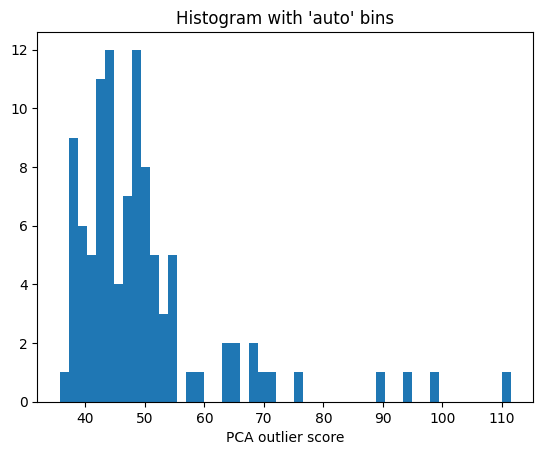

In [ ]:
import matplotlib.pyplot as plt
plt.hist(y_train_scores_pca, bins=50)  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.xlabel('PCA outlier score')
plt.show()

The bellow table presents the characteristics of the normal and abnormal groups. It shows the count and count percentage of the normal and outlier groups. You are reminded to label the features with their feature names for an effective presentation. The table tells us several important results:

In [ ]:
def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)
    
descriptive_stat_threshold(X_train,y_train_scores_pca, threshold_pca)

,Group,Count,Count %,0,1,2,3,4,5,6,...,9,10,11,12,13,14,15,16,17,Anomaly_Score
0,Normal,98,95.145631,-0.04,-0.09,-0.06,-0.13,-0.16,-0.14,-0.15,...,-0.05,-0.04,-0.06,-0.12,0.05,-0.07,-0.08,0.06,-0.17,47.60
1,Outlier,5,4.854369,0.07,0.09,1.12,2.60,1.30,0.59,2.92,...,-0.33,-1.06,-0.19,-0.27,0.27,-0.17,-0.13,0.02,1.16,93.82


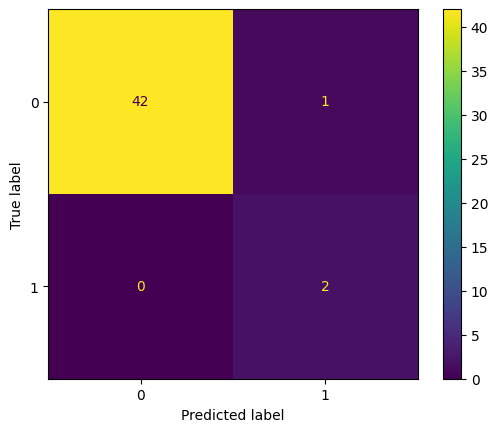

In [ ]:
cm = confusion_matrix(y_test, y_test_pred_pca)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
print("\nOn Training Data:")
evaluate_print('PCA', y_train, y_train_scores_pca)
print("\nOn Test Data:")
evaluate_print('PCA', y_test, y_test_scores_pca)


On Training Data:
PCA ROC:0.9773, precision @ rank n:0.5

On Test Data:
PCA ROC:1.0, precision @ rank n:1.0


###PCA plot using the library sklearn

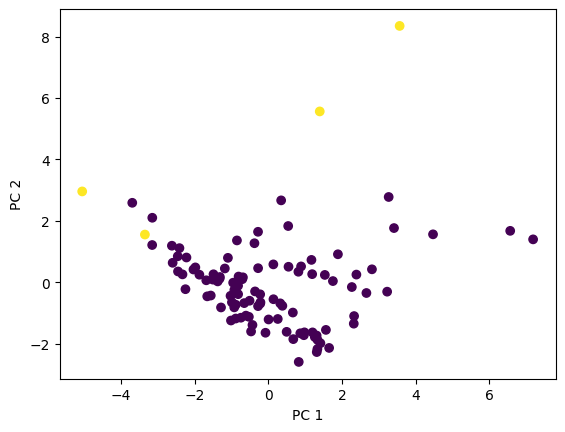

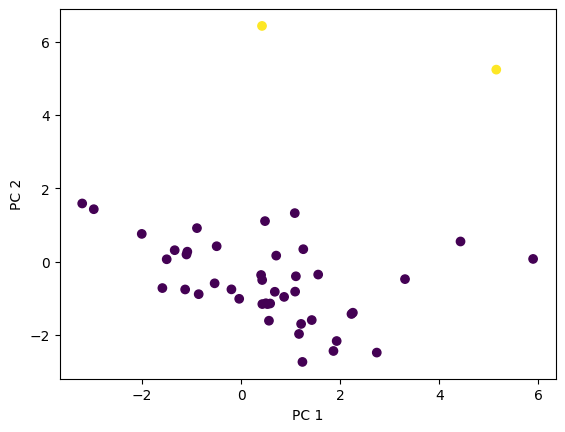

In [ ]:
# fit PCA on training data
pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# create a scatter plot of the projected data
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

# create a scatter plot of the projected data
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

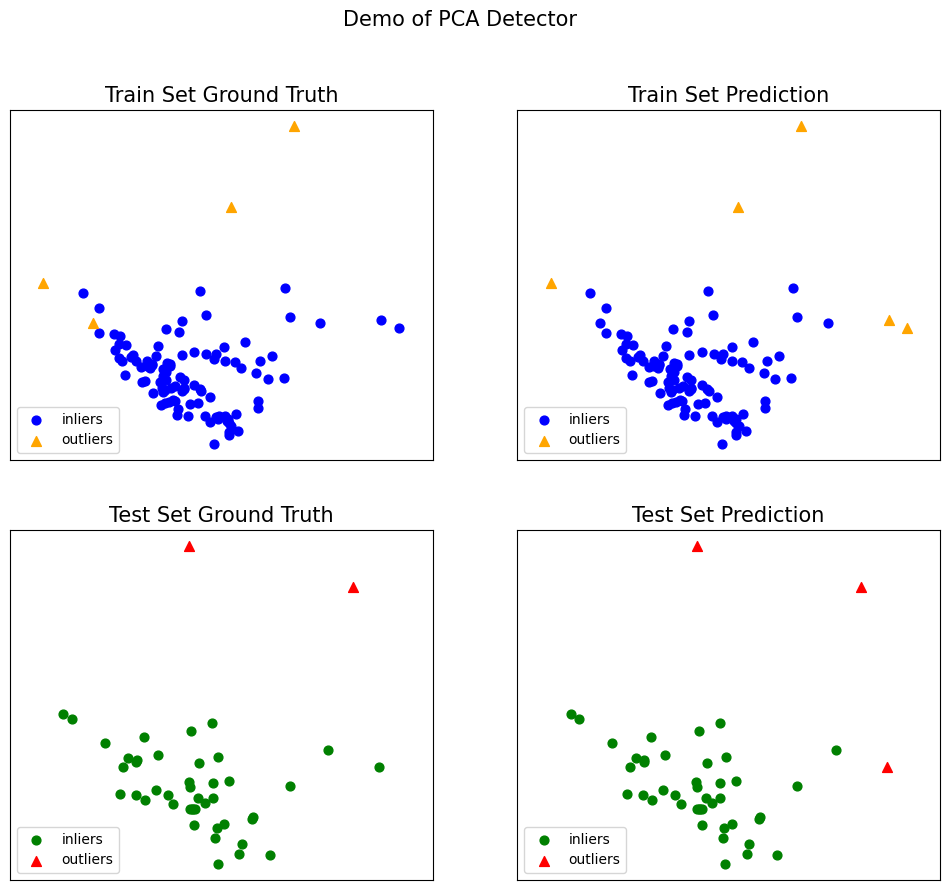

In [ ]:
# Visualize the training set and the outliers
visualize('PCA', X_train_pca, y_train, X_test_pca, y_test, y_train_pred_pca, y_test_pred_pca, show_figure=True, save_figure=False)

##KPCA

###Anomaly Detection

In [ ]:
# KPCA
kpca = KPCA_PYOD(n_components=2, kernel='rbf', gamma=0.015, contamination=contamination)
kpca.fit(X_train, y=None)

KPCA(alpha=None, coef0=None, contamination=0.04054054054054054, copy_X=None,
   degree=None, eigen_solver=None, gamma=None, kernel=None,
   kernel_params=None, max_iter=None, n_components=2, n_jobs=None,
   n_selected_components=None,
   random_state=RandomState(MT19937) at 0x7FB600489440,
   remove_zero_eig=None, sampling=False, subset_size=20, tol=None)

In [ ]:
#kpca.get_params()
#kpca.decision_scores_
#kpca.labels_
#kpca.decision_function(X_train)
#kpca.fit_predict(X_train, y=None)
#kpca.fit_predict_score(X_train, y_train, scoring='roc_auc_score')
#kpca.predict(X_train, return_confidence=False)
#kpca.predict_confidence(X_train)
#kpca.predict_proba(X_train, method='linear', return_confidence=False)

In [ ]:
threshold_kpca = kpca.threshold_
print("The threshold of the KPCA method for the defined comtanimation rate:" , threshold_kpca)

The threshold of the KPCA method for the defined comtanimation rate: 0.5624641606099022


In [ ]:
# KPCA
# get the prediction labels and outlier scores of the training data
y_train_pred_kpca = kpca.labels_
y_train_scores_kpca = kpca.decision_scores_

# get the prediction labels and outlier scores of the test data
y_test_scores_kpca = kpca.decision_function(X_test)
y_test_pred_kpca = kpca.predict(X_test)

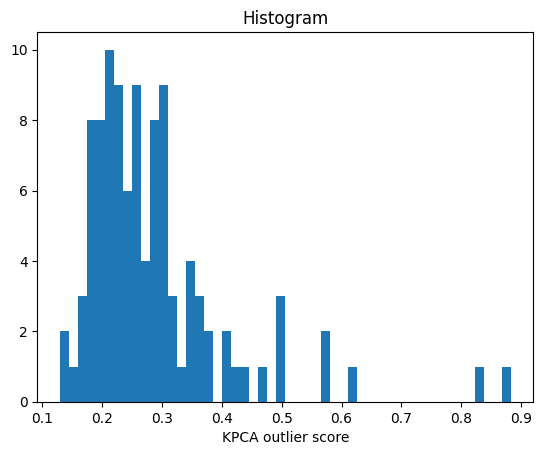

In [ ]:
import matplotlib.pyplot as plt
plt.hist(y_train_scores_kpca, bins=50)  # arguments are passed to np.histogram
plt.title("Histogram")
plt.xlabel('KPCA outlier score')
plt.show()

In [ ]:
descriptive_stat_threshold(X_train,y_train_scores_kpca, threshold_kpca)

,Group,Count,Count %,0,1,2,3,4,5,6,...,9,10,11,12,13,14,15,16,17,Anomaly_Score
0,Normal,98,95.145631,-0.07,-0.05,-0.01,-0.03,-0.14,-0.10,-0.11,...,-0.00,-0.04,-0.07,-0.10,0.02,-0.07,-0.08,0.04,-0.17,0.27
1,Outlier,5,4.854369,0.81,-0.71,0.06,0.72,0.83,-0.21,2.12,...,-1.29,-1.06,0.04,-0.53,0.73,-0.17,-0.13,0.51,1.16,0.70


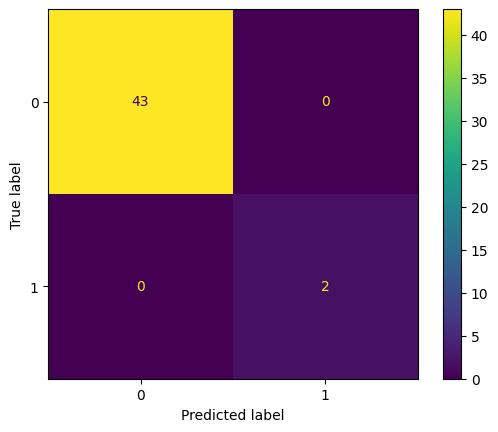

In [ ]:
cm = confusion_matrix(y_test, y_test_pred_kpca)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
print("\nOn Training Data:")
evaluate_print('KPCA', y_train, y_train_scores_kpca)
print("\nOn Test Data:")
evaluate_print('KPCA', y_test, y_test_scores_kpca)


On Training Data:
KPCA ROC:0.9167, precision @ rank n:0.5

On Test Data:
KPCA ROC:1.0, precision @ rank n:1.0


In [ ]:
#kpca.fit_predict_score(X_train, y_train, scoring='roc_auc_score')

In [ ]:
#kpca.fit_predict_score(X_train, y_train, scoring='prc_n_score')

###KPCA using the library:sklearn

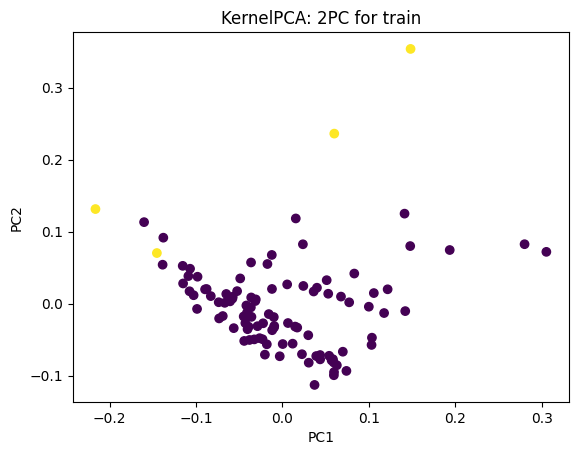

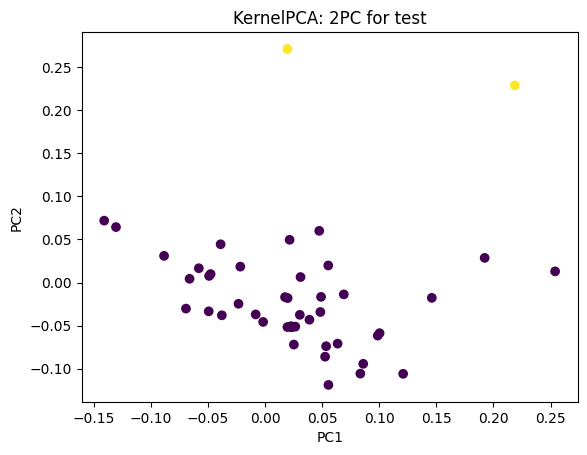

In [ ]:
# fit KernelPCA on training data
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.001)
X_train_kpca = kpca.fit_transform(X_train)
X_test_kpca = kpca.transform(X_test)

# create a scatter plot of the projected data
plt.scatter(X_train_kpca[:, 0], X_train_kpca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KernelPCA: 2PC for train')
plt.show()

# create a scatter plot of the projected data
plt.scatter(X_test_kpca[:, 0], X_test_kpca[:, 1], c=y_test, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KernelPCA: 2PC for test')
plt.show()

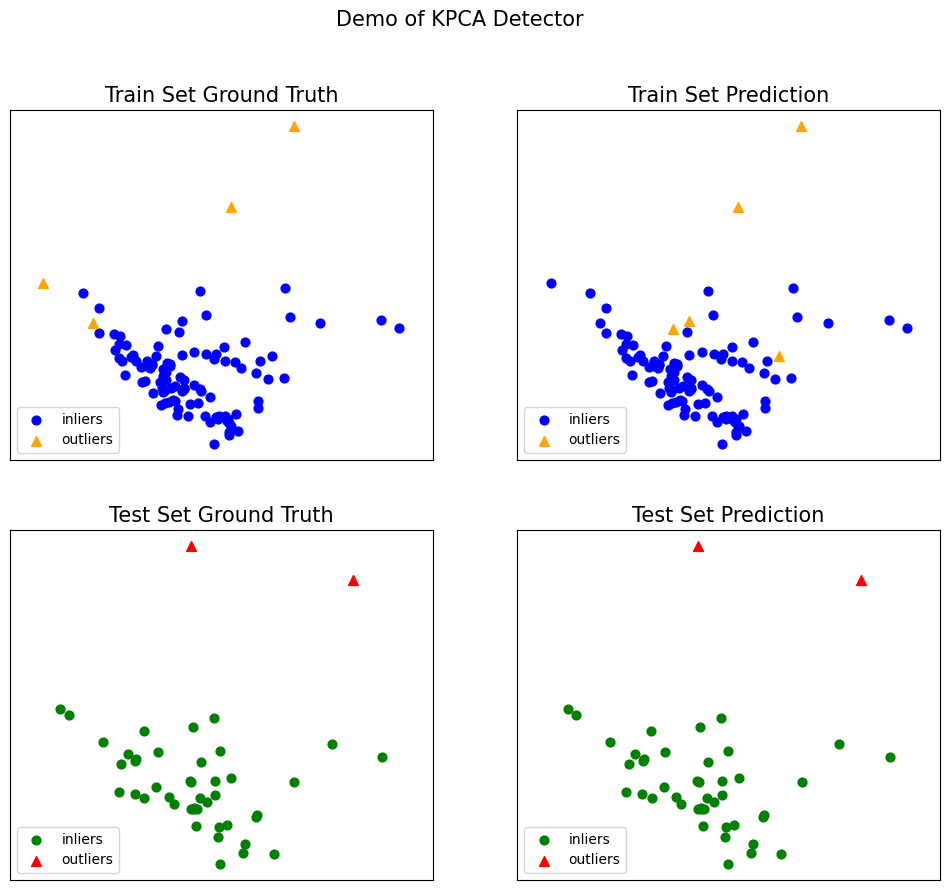

In [ ]:
# Visualize the training set and the outliers
visualize('KPCA', X_train_pca, y_train, X_test_kpca, y_test, y_train_pred_kpca, y_test_pred_kpca, show_figure=True, save_figure=False)

In [ ]:
# Define a list of kernel functions and parameters to try
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
gammas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

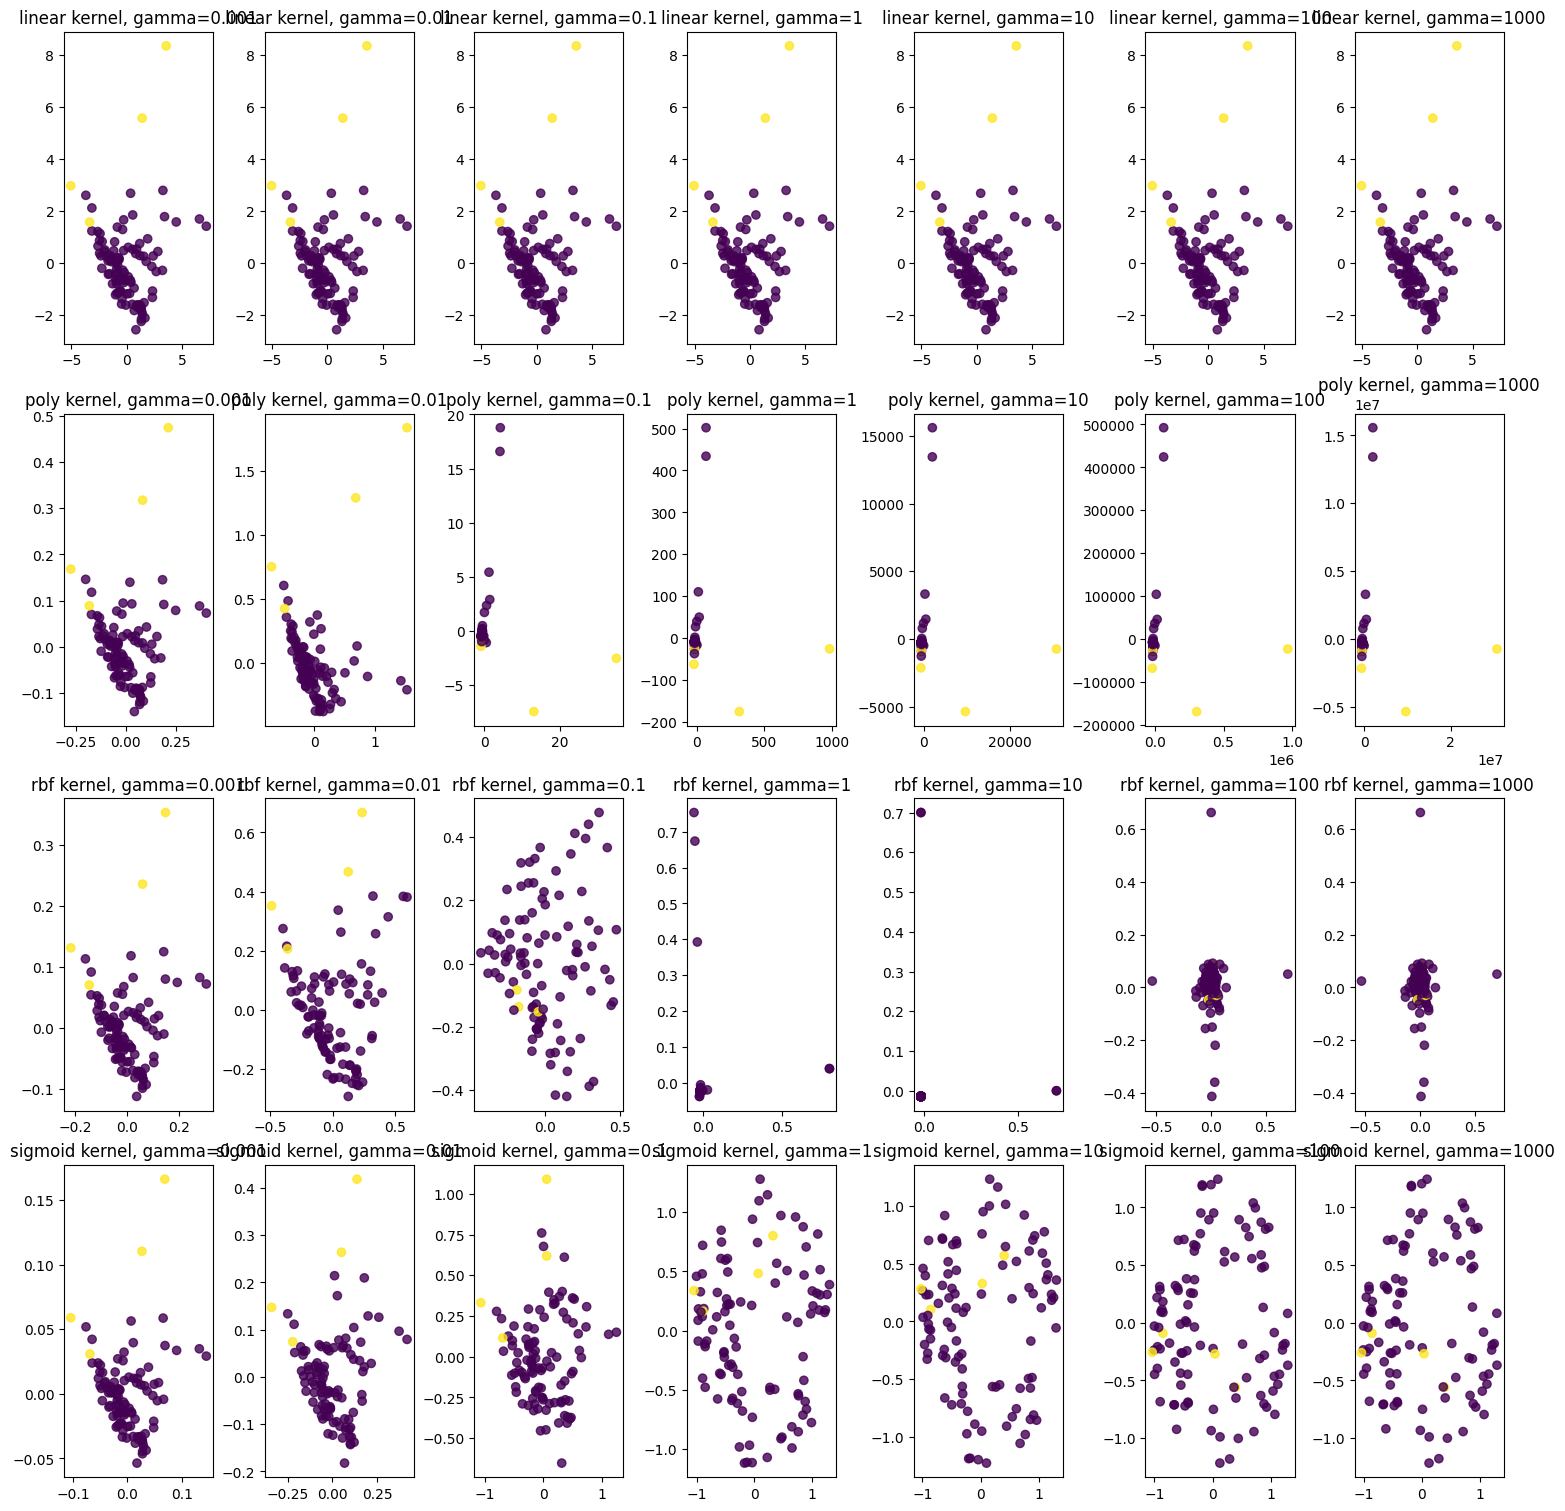

In [ ]:
# Perform kernelPCA
# Initialize a subplot grid to plot the results
fig, axs = plt.subplots(len(kernels), len(gammas), figsize=(15, 15), constrained_layout=True)

# Loop over the kernels and gammas and perform KPCA
for i, kernel in enumerate(kernels):
    for j, gamma in enumerate(gammas):
        # Initialize the KPCA transformer and fit the data
        kpca = KernelPCA(n_components=2, kernel=kernel, gamma=gamma)
        X_kpca = kpca.fit_transform(X_train)

        # Plot the results
        axs[i, j].scatter(X_kpca[:, 0], X_kpca[:, 1], c=y_train, cmap='viridis', alpha=0.8)
        axs[i, j].set_title(f'{kernel} kernel, gamma={gamma}')

plt.show()

# **PCA and kernelPCA with Logistic regression**

## **PCA_101 + Logistic Regression**

In [ ]:
pca = PCA(n_components=2)# we make an instance of PCA and decide how many components we want to have
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
print(X_train.shape) # As we can see, we have reduced feature into 2 main features
print(X_test.shape)

(103, 2)
(45, 2)


In [ ]:
pca.components_

array([[ 0.18096565,  0.19579888,  0.30406631,  0.29554778,  0.32347942,
         0.28021831,  0.24501409,  0.14039522,  0.07042615,  0.2446675 ,
         0.17323587,  0.27453743,  0.17171914,  0.16508115,  0.27651055,
         0.18704387,  0.23948157,  0.30077866],
       [-0.04975953,  0.0529888 ,  0.25872156,  0.29693201,  0.25834167,
         0.07663705,  0.32578339, -0.20437599,  0.39439681, -0.37246379,
        -0.37708604, -0.21048208, -0.18497935, -0.02572314, -0.30462983,
        -0.09174902, -0.03703377,  0.0291587 ]])

In [ ]:
df_comp=pd.DataFrame(pca.components_)
df_comp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.180966,0.195799,0.304066,0.295548,0.323479,0.280218,0.245014,0.140395,0.070426,0.244667,0.173236,0.274537,0.171719,0.165081,0.276511,0.187044,0.239482,0.300779
1,-0.049760,0.052989,0.258722,0.296932,0.258342,0.076637,0.325783,-0.204376,0.394397,-0.372464,-0.377086,-0.210482,-0.184979,-0.025723,-0.304630,-0.091749,-0.037034,0.029159


<Axes: >

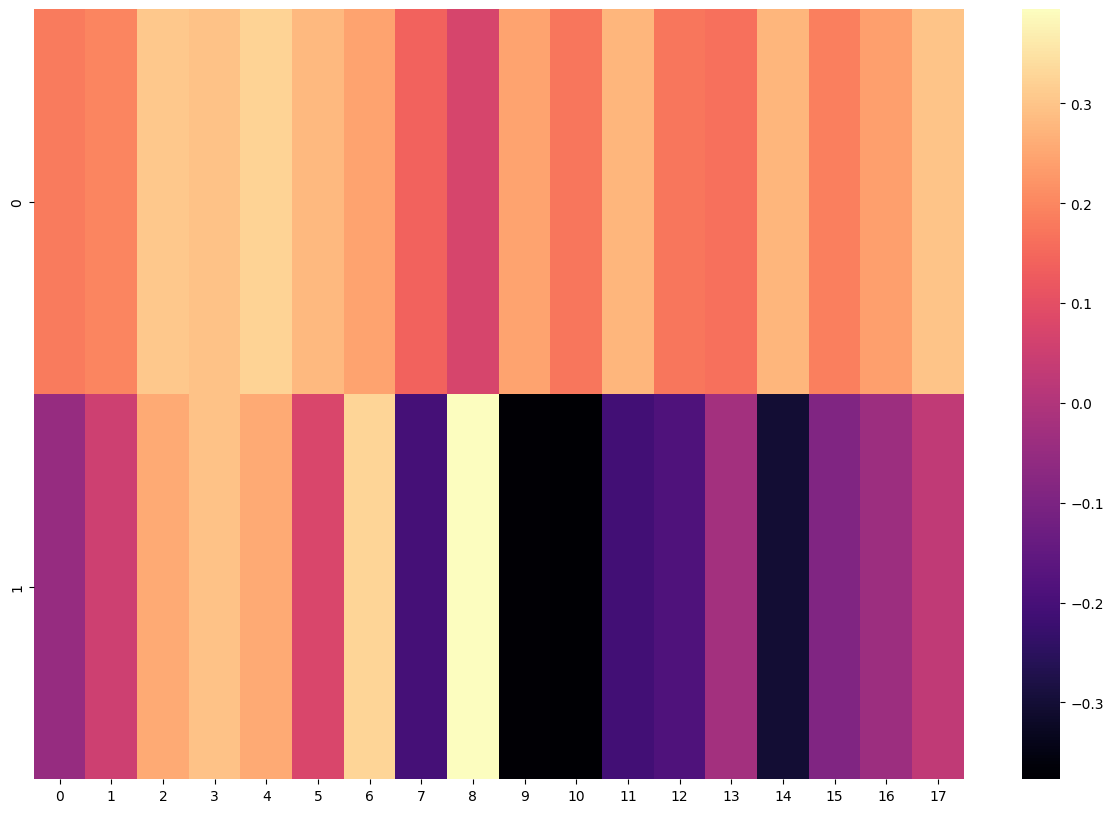

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df_comp,cmap="magma")

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [ ]:
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
#We have %100 procent accuracy although we have just used the main components of the data

0.9777777777777777
[[43  0]
 [ 1  1]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       1.00      0.50      0.67         2

    accuracy                           0.98        45
   macro avg       0.99      0.75      0.83        45
weighted avg       0.98      0.98      0.97        45



<ipython-input-678-a623602fd417>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


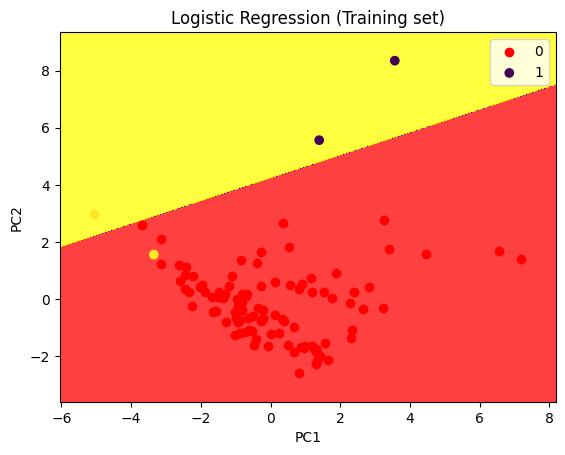

In [ ]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue', 'yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue', 'yellow'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

<ipython-input-679-80dd0398dada>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


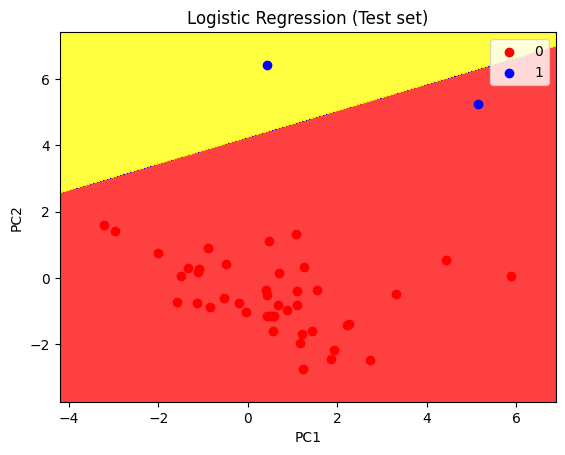

In [ ]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue', 'yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue', 'yellow'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## **KPCA_101 + Logistic Regression**

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(118, 18)
(30, 18)


In [ ]:
kpca= KernelPCA(n_components=2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(118, 2)
(30, 2)


In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9333333333333333
[[28  0]
 [ 2  0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       0.00      0.00      0.00         2

    accuracy                           0.93        30
   macro avg       0.47      0.50      0.48        30
weighted avg       0.87      0.93      0.90        30



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<ipython-input-683-422034ce0744>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


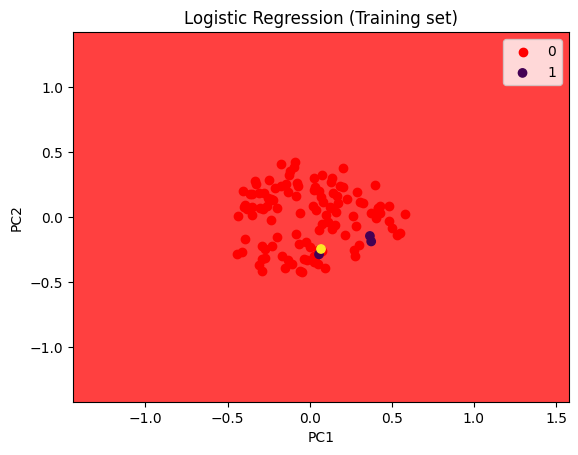

In [ ]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'black', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'black', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

<ipython-input-684-ce633a8ddc04>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


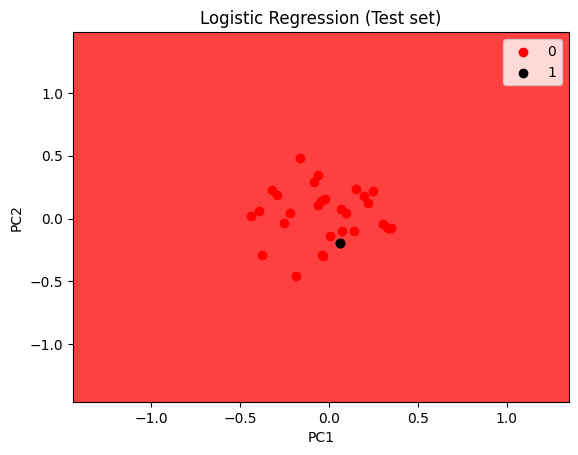

In [ ]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'black', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'black', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()